<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/PodcastDownloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
import os
import time
import pandas as pd

#Scraping for the podcasts (mp3 files)

##Get the webpage content with the requests

In [ ]:
rrs_url = 'https://feeds.megaphone.fm/darknetdiaries'

In [ ]:
page = requests.get(rrs_url)
soup = bs(page.content, 'xml')

In [ ]:
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<rss version="2.0" xmlns:atom="http://www.w3.org/2005/Atom" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:googleplay="http://www.google.com/schemas/play-podcasts/1.0" xmlns:itunes="http://www.itunes.com/dtds/podcast-1.0.dtd" xmlns:media="http://search.yahoo.com/mrss/">
 <channel>
  <atom:link href="https://feeds.megaphone.fm/darknetdiaries" rel="self" type="application/rss+xml"/>
  <title>
   Darknet Diaries
  </title>
  <link>
   https://darknetdiaries.com/
  </link>
  <language>
   en-us
  </language>
  <copyright>
   Jack Rhysider
  </copyright>
  <description>
   Explore true stories of the dark side of the Internet with host Jack Rhysider as he takes you on a journey through the chilling world of hacking, data breaches, and cyber crime.
  </description>
  <image>
   <url>
    https://megaphone.imgix.net/podcasts/29bed80a-d8cc-11e8-b199-aba552a0bbdf/image/uploads_2F1562951997273-pdd2keiryql-99f75240ab90a579e25720d85d3057b2_2Fd

###Get all of the items (podcasts)

In [ ]:
podcast_items = soup.find_all('item')

In [ ]:
len(podcast_items)

132

### Display the newest podcast's title and description

In [ ]:
podcast_items[-1].find('description').get_text()

"Farhan Arshad and Noor Aziz Uddin were captured 2 years after being placed on the FBI's Cyber's Most Wanted list for PBX hacking. In this episode, we explain PBX hacking and how hackers are racking up billions of dollars in phone bills. We also learn how the two men were captured.\nLearn more about your ad choices. Visit podcastchoices.com/adchoices"

In [ ]:
podcast_items[-1].find('title').get_text()

'Ep 1: The Phreaky World of PBX Hacking'

###Find the "enclosure" tag with the mp3 file

In [ ]:
mp3_url = podcast_items[-1].find('enclosure')['url']

##Download the file to a specified directory

In [ ]:
mp3_file = requests.get(mp3_url)
path = '/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/'
with open(path + 'mp3_file', 'wb') as f:
  f.write(mp3_file.content)

##Get all the items

In [ ]:
counter = 0

for podcast in podcast_items:
  if counter == 10:
    break
  title = podcast.find('title').get_text()
  title = title.replace(" ", "_")
  mp3_url = podcast.find('enclosure')['url']
  mp3_file = requests.get(mp3_url)
  path = '/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/'
  with open(path + title + '.mp3', 'wb') as f:
    f.write(mp3_file.content)
  counter += 1

##Finding a keyword in the description

In [ ]:
counter = 0

for podcast in podcast_items:
  if counter == 10:
    break
  title = podcast.find('title').text.replace(" ", "_")
  description = podcast.find('description').text

  if re.search(r'\bhack\b', description, re.I):
    print(title, ": ", description)
    counter += 1

118:_Hot_Swaps :  This is the story of Joseph Harris (https://twitter.com/akad0c). When he was a young teen he got involved with stealing video game accounts and selling them for money. This set him on a course where he flew higher and higher until he got burned.

Joseph sometimes demonstrates vulnerabilities he finds on his YouTube channel https://www.youtube.com/channel/UCdcuF5Zx6BiYmwnS-CiRAng.

Listen to episode 112 “Dirty Coms” to hear more about what goes on in the communities Joseph was involed with.

Sponsors
Support for this show comes from Axonius. Securing assets — whether managed, unmanaged, ephemeral, or in the cloud — is a tricky task. The Axonius Cybersecurity Asset Management Platform correlates asset data from existing solutions to provide an always up-to-date inventory, uncover gaps, and automate action. Axonius gives IT and security teams the confidence to control complexity by mitigating threats, navigating risk, decreasing incidents, and informing business-level st

#Transcription of the podcasts with the AssemblyAI

##API key

In [5]:
# api_key = os.environ['assemblyAI_apikey']
api_key = 'd51b30a7209f436a95a16815f4d2c48c'

##Upload the file

In [ ]:
path = '/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/'
# filename = path + "foo.mp3"

def read_file(filename, chunk_size=5242880):
    with open(filename, 'rb') as _file:
        while True:
            data = _file.read(chunk_size)
            if not data:
                break
            yield data

In [ ]:
path = '/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/'
filenames = os.listdir(path)

for filename in filenames:
  filepath = path + filename
  print(filepath)
  headers = {'authorization': api_key} 
  response = requests.post('https://api.assemblyai.com/v2/upload',
          headers = headers,
          data = read_file(filepath))
  print(response.json())

/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/130:_Jason's_Pen_Test.mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/89975bf3-8e4c-4c47-b37a-b7b84b9ee86a'}
/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/131:_Welcome_to_Video.mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/92a8fe2f-74f9-4b0c-91f7-212b4d69f304'}
/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/129:_Gollumfun_(Part_2).mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/489cf61f-561c-41e7-b942-bf0708067c51'}
/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/128:_Gollumfun_(Part_1).mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/3bc3de6b-0930-4950-b978-49bb1d1ea0a7'}
/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/127:_Maddie.mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/12574339-830e-4c8d-8620-f2dee31b56b7'}
/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/126:_REvil.mp3
{'upload_url': 'https://cdn.assemblyai.com/upload/a610b0

##Create a transcript

In [ ]:
endpoint = "https://api.assemblyai.com/v2/transcript"
json = {
    "audio_url": "https://cdn.assemblyai.com/upload/31461af3-6642-4214-8b83-06bd0760003c",
    "audio_start_from": 120*1000, #[ms]
    "audio_end_at": 420*1000
}
headers = {
    "authorization": api_key,
    "content-type": "application/json"
}
response = requests.post(endpoint, json=json, headers=headers)
print(response.json())

{'id': 'r8wjp34eji-c4a0-448b-bf02-0d66270c137e', 'language_model': 'assemblyai_default', 'acoustic_model': 'assemblyai_default', 'language_code': 'en_us', 'status': 'queued', 'audio_url': 'https://cdn.assemblyai.com/upload/31461af3-6642-4214-8b83-06bd0760003c', 'text': None, 'words': None, 'utterances': None, 'confidence': None, 'audio_duration': None, 'punctuate': True, 'format_text': True, 'dual_channel': None, 'webhook_url': None, 'webhook_status_code': None, 'webhook_auth': False, 'webhook_auth_header_name': None, 'speed_boost': False, 'auto_highlights_result': None, 'auto_highlights': False, 'audio_start_from': 120000, 'audio_end_at': 420000, 'word_boost': [], 'boost_param': None, 'filter_profanity': False, 'redact_pii': False, 'redact_pii_audio': False, 'redact_pii_audio_quality': None, 'redact_pii_policies': None, 'redact_pii_sub': None, 'speaker_labels': False, 'content_safety': False, 'iab_categories': False, 'content_safety_labels': {}, 'iab_categories_result': {}, 'language_

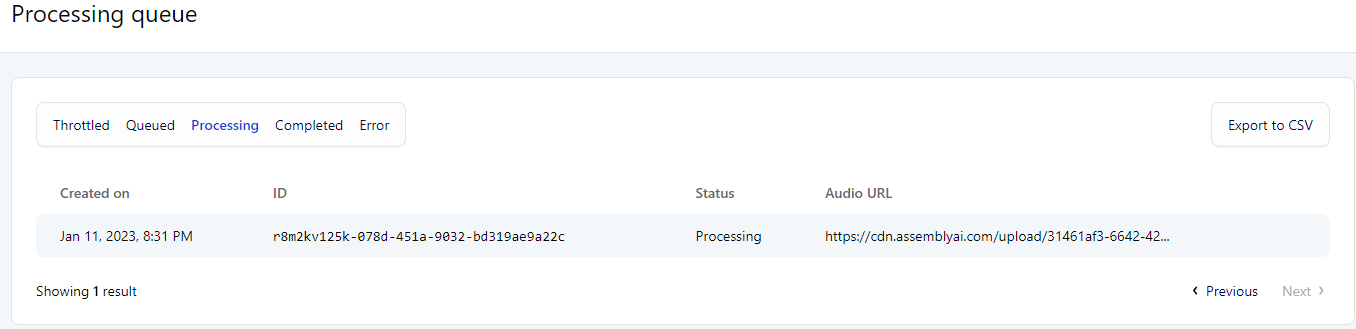

In [ ]:
print(response.json()['status'])

queued


##Get a transcription

In [ ]:
# id = response.json()['id']
id = 'r8m2kv125k-078d-451a-9032-bd319ae9a22c'

In [ ]:
endpoint = "https://api.assemblyai.com/v2/transcript/" + id

headers = {
    "authorization": api_key,
    # "content-type": "application/json"
}
response = requests.get(endpoint, headers=headers)
print(response.json()['text'])

Dark side, which sometimes when you follow the money, can lead you to the darkest places on the Internet. These are true stories from the dark side of the Internet. I'm jack resider. This is darknet diaries. Support for this episode comes from exonius. Complexity is increasing in it, and cybersecurity adapt to the demands of your modern environment. With exonius and zigabytes of manual asset inventory approaches, the exonius solution provides an always up to date inventory, uncovers gaps and automates action, giving you the solid foundation you need to stay dynamic in the face of complexity. Go to exonius.com darknet to learn more and to get a demo that's spelled Axonius exonius. Comdarknet. For this episode, we're talking once again with Andy Greenberg. Do I sound okay? Like, I have other this is Andy's third appearance on the show, but if you don't remember, he's the one who wrote the book sandworm, which talks about Russia doing a cyber attack on Ukraine using not pet, ya and other 

#Upload, transcript, get response in one function

In [ ]:
def process(podcast):
  # output_ids = []
  headers = {'authorization': api_key} 
  response = requests.post('https://api.assemblyai.com/v2/upload',
          headers = headers,
          data = read_file(podcast))
  # print(response.json())

  endpoint = "https://api.assemblyai.com/v2/transcript"
  json = {
      "audio_url": response.json()['upload_url'],
      "audio_start_from": 120*1000, #[ms]
      "audio_end_at": 240*1000,
      "sentiment_analysis": True,
      "summarization": True,
      "summary_model": "informative",
      "summary_type": "bullets"
  }
  headers = {
      "authorization": api_key,
      "content-type": "application/json"
  }
  response = requests.post(endpoint, json=json, headers=headers)
  return response.json()['id']

In [ ]:
path = '/content/drive/MyDrive/Projekty/Podcast Downloader/Podcasts/'
filenames = os.listdir(path)

podcast_ids = []
counter = 0

for filename in filenames:
  if counter < 10:
    filepath = path + filename
    podcast_id = process(filepath)
    podcast_ids.append(podcast_id)
    print(f'Right now we are processing {filename} with id {podcast_id}')
    counter += 1

Right now we are processing 130:_Jason's_Pen_Test.mp3 with id r85myp1i0c-a999-412e-8b52-0356611d542d
Right now we are processing 131:_Welcome_to_Video.mp3 with id r85mxcrncx-a770-4de9-92f8-835385d35a7e
Right now we are processing 129:_Gollumfun_(Part_2).mp3 with id r85mbu3d3e-615e-46e2-b545-8fbc6a530b90
Right now we are processing 128:_Gollumfun_(Part_1).mp3 with id r85m0izdds-d242-482c-8ff9-13ded045da56
Right now we are processing 127:_Maddie.mp3 with id r85m71n6u3-59f3-42f0-88e4-59676c9beecc
Right now we are processing 126:_REvil.mp3 with id r85mlki6pm-b2a3-434b-a665-f63a9973b764
Right now we are processing 125:_Jeremiah.mp3 with id r85mlhn4bf-a6e8-4982-89d4-728304aa0a40
Right now we are processing 124:_Synthetic_Remittance.mp3 with id r85mizltlc-8d02-4c6a-b6d4-40132704eae0
Right now we are processing 123:_Newswires.mp3 with id r85mipa1yh-60ef-40a1-ab6a-836f84900f29
Right now we are processing 122:_Lisa.mp3 with id r85mq1smh5-d0d4-41f3-84dc-f227bec49d09


In [3]:
# podcast_ids
podcast_ids = ['r85myp1i0c-a999-412e-8b52-0356611d542d',
 'r85mxcrncx-a770-4de9-92f8-835385d35a7e',
 'r85mbu3d3e-615e-46e2-b545-8fbc6a530b90',
 'r85m0izdds-d242-482c-8ff9-13ded045da56',
 'r85m71n6u3-59f3-42f0-88e4-59676c9beecc',
 'r85mlki6pm-b2a3-434b-a665-f63a9973b764',
 'r85mlhn4bf-a6e8-4982-89d4-728304aa0a40',
 'r85mizltlc-8d02-4c6a-b6d4-40132704eae0',
 'r85mipa1yh-60ef-40a1-ab6a-836f84900f29',
 'r85mq1smh5-d0d4-41f3-84dc-f227bec49d09']

In [ ]:
for podcast_id in podcast_ids:
  endpoint = f"https://api.assemblyai.com/v2/transcript/{podcast_id}"
  while True:
    headers = {
        "authorization": api_key,
        # "content-type": "application/json"
    }
    response = requests.get(endpoint, headers=headers)
    status = response.json()['status']
    #The status of the transcription. queued, processing, completed, or error
    if status == 'completed':
      print('File processed.')
      with open(f'/content/drive/MyDrive/Projekty/Podcast Downloader/Transcripts/{podcast_id}.txt', 'w') as f:
        f.write(response.json()['text'])
      break
      print('File processed')
    elif status == 'error':
      print('Something went wrong.')
    print('File is still being processed.')
    time.sleep(180)

File is still being processed.
File processed.
File processed.
File processed.
File processed.
File processed.
File processed.
File processed.
File processed.
File is still being processed.
File processed.
File processed.


##Sentiment analysis

In [6]:
first_id = podcast_ids[0]
endpoint = f"https://api.assemblyai.com/v2/transcript/{first_id}"
headers = {
    "authorization": api_key,
    # "content-type": "application/json"
}
response = requests.get(endpoint, headers=headers)
SAR = response.json()['sentiment_analysis_results']
print(SAR)

[{'text': 'Running with a Linux operating system in a few minutes.', 'start': 120000, 'end': 122286, 'sentiment': 'NEUTRAL', 'confidence': 0.7703019380569458, 'speaker': None}, {'text': "I've been using this service for years and I think it's great because once your Linode is set up, they have a slick cloud manager to control your servers easily.", 'start': 122388, 'end': 129562, 'sentiment': 'POSITIVE', 'confidence': 0.9797082543373108, 'speaker': None}, {'text': "Like if you want to set up a WordPress site, lampstack or even a Minecraft server, it's literally one click.", 'start': 129626, 'end': 134814, 'sentiment': 'NEUTRAL', 'confidence': 0.6117839217185974, 'speaker': None}, {'text': 'So head on over to linode.com.', 'start': 134932, 'end': 137246, 'sentiment': 'NEUTRAL', 'confidence': 0.8480305671691895, 'speaker': None}, {'text': "That's spelled Linodelinode.com darknet.", 'start': 137348, 'end': 143870, 'sentiment': 'NEUTRAL', 'confidence': 0.7586463093757629, 'speaker': None},

#DataFrame

In [8]:
df = pd.DataFrame(SAR)
df

,text,start,end,sentiment,confidence,speaker
0,Running with a Linux operating system in a few...,120000,122286,NEUTRAL,0.770302,None
1,I've been using this service for years and I t...,122388,129562,POSITIVE,0.979708,None
2,"Like if you want to set up a WordPress site, l...",129626,134814,NEUTRAL,0.611784,None
3,So head on over to linode.com.,134932,137246,NEUTRAL,0.848031,None
4,That's spelled Linodelinode.com darknet.,137348,143870,NEUTRAL,0.758646,None
5,"In this episode, we're going to hear some stor...",146330,149010,NEUTRAL,0.905803,None
6,Haddocks I've always been into computers?,149090,151234,NEUTRAL,0.801297,None
7,I think I had my first computer when I was ele...,151282,154102,NEUTRAL,0.829675,None
8,I think my parents got it for me for Christmas...,154156,163740,POSITIVE,0.546672,None
9,Any dark stuff you were looking into back then...,166030,172638,NEGATIVE,0.584641,None
